# How walking and sleeping have an impact on your mood?

## A data set will be used to create a cluster of information to examine how walking and sleeping affect someone's mood.

In [1]:
## Data set loading
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='fitness.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


In [2]:
## selecting the important columns
df_fit = df_data_1[['step_count', 'mood', 'hours_of_sleep']]

In [3]:
## Looking at the shape of the newly formed dataset
df_fit.shape

(96, 3)

In [4]:
df_fit.head()

,step_count,mood,hours_of_sleep
0,5464,200,5
1,6041,100,8
2,25,100,5
3,5461,100,4
4,6915,200,5


In [5]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 10)

In [7]:
from sklearn.preprocessing import StandardScaler
X = df_fit
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
## creating a k-means model
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 10)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 1 0 0 2 2 1 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 1 1 2 2 2 1 1 1 0 0 2 2 2 0
 1 2 2 2 2 1 1 1 2 0 2 0 0 1 1 1 1 0 2 1 1 2 2 0 1 2 1 2 1 1 0 2 0 1 1 1 2
 1 0 2 2 1 1 1 0 2 0 2 1 1 1 1 2 1 1 1 1 1 1]


In [9]:
df_fit["group"] = labels
df_fit.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,step_count,mood,hours_of_sleep,group
0,5464,200,5,0
1,6041,100,8,0
2,25,100,5,1
3,5461,100,4,0
4,6915,200,5,0


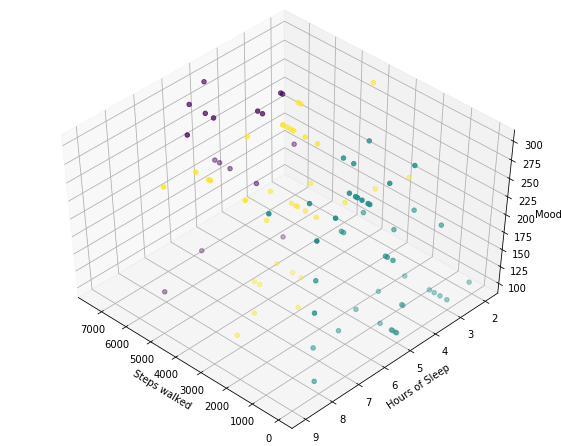

In [10]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.xlabel('Steps walked', fontsize=16)
# plt.zlabel('Mood', fontsize=16)
# plt.ylabel('Hours of Sleep', fontsize=16)
ax.set_xlabel('Steps walked')
ax.set_ylabel('Hours of Sleep')
ax.set_zlabel('Mood')

ax.scatter(X[:, 0], X[:, 2], X[:, 1], c= labels.astype(np.float))


In [11]:
df_fit.corr()

,step_count,mood,hours_of_sleep,group
step_count,1.000000,0.246738,0.080687,-0.132168
mood,0.246738,1.000000,0.210417,-0.001089
hours_of_sleep,0.080687,0.210417,1.000000,0.058829
group,-0.132168,-0.001089,0.058829,1.000000


In [12]:
df_fit2 = df_fit.groupby('group').mean()

In [15]:
df_fit2['color'] = ['purple', 'green', 'yellow']

In [16]:
df_fit2.head()

,step_count,mood,hours_of_sleep,color
group,,,,
0,6139.470588,235.294118,5.235294,purple
1,898.068182,193.181818,5.068182,green
2,3941.828571,222.857143,5.400000,yellow
